# Python Project: classification of iris flowers


## 1. Problem: Classification of iris flowers.
***Type of Problem:*** Multiclass CLassification<br>***Attributes(4 nos):*** Numeric, all attributes are in same units and same scale[Not requiring any transformation]<br>***Data:*** 150 observations<br>

In [1]:
# a) Load libraries

# CLassification Problem

# Data Load- pandas, numpy

# plotting- pandas.plotting, matplotlib,seaborn

# data split- train_test, kfold

# Models-
# Logistic Regression, Decision Tree, KNeighbours, LinearDiscriminantAnalysis, GaussianNB, SVC

# Eval Metrics
# accuracy_score, confusion matrix, classification report

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# b) Load dataset
dataset=pd.read_csv("C:\\Users\\varun sawhney\\Desktop\\BOOKS\\6. Machine Learning Mastery with python\\iris.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 2. Summarize Data

#### a) Descriptive statistics
Take Look at the data, considering following points:
1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical Summary of all attributes.
4. Breakdown of the data by the class variable

In [3]:
# 1. Dimension of the dataset
dataset.shape

(150, 5)

In [4]:
# 2. Peek at the dataset
dataset.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [5]:
# 3. Statistical Summary
dataset.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
# 4. Class Distribution
dataset.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

#### b) Data visualizations
1. Univariate plots to understand each attribute
    <br>a. Boxplot<br>b. Histograms
2. Multivariate plots to understand relationship between attributes.
    <br> Pairplot

#### 1. univariate plots

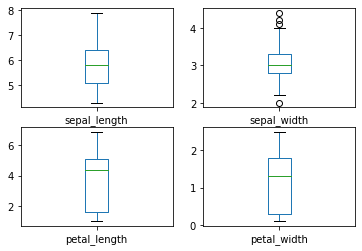

In [7]:
# a. Boxplot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

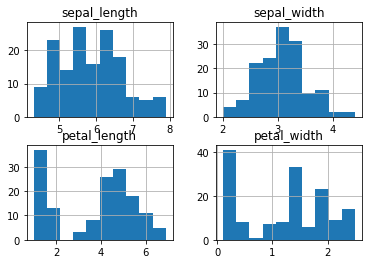

In [8]:
# b. Histograms
dataset.hist()
pyplot.show()

***It looks like perhaps two of the input variables have a Gaussian distribution. This is useful to note as we can use algorithms that can exploit this assumption.***

#### 2. Multivariate Plot
Now we can look at the interactions between the variables. Let's look at scatter plots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

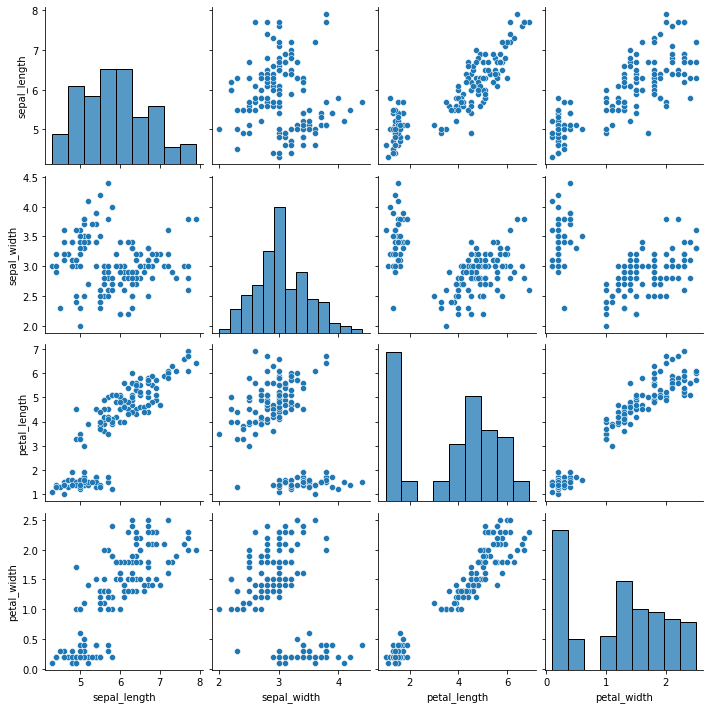

In [9]:
# Pairplot
sns.pairplot(dataset)
pyplot.show()

In [10]:
dataset.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


***Note the diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.***

## 3. Prepare Data
a) Data Cleaning
<br>b) Feature Selection
<br>c) Data Transforms

In [11]:
# Data has no missing values, all features

## 4. Evaluate Algorithms
Now it is time to create some models of the data and estimate their accuracy on unseen data.
<br>Here is what we are going to cover in this step:
1. Separate out a validation dataset.
2. Setup the test harness to use 10-fold cross validation.
3. Build 6 different models to predict species from flower measurements
4. Select the best model.

In [12]:
# a) Split-out validation dataset
target=dataset.iloc[:,4]
predictors=dataset.iloc[:,:4]
seed=7
x_train,x_test,y_train,y_test=train_test_split(predictors,target,test_size=0.2,random_state=seed)

In [13]:
# b) Test Harness and Evaluation Metric:

# Test Harness:
# We will use 10-fold cross validation to estimate accuracy. 
# This will split our dataset into 10 parts, train on 9 and test on 1 and 
# repeat for all combination of train-test splits.
# Evaluation Metric:
# accuracy_score

In [14]:
# c) Spot Check Algorithms
# We don't have idea which algorithm will be good for this problem or what configuration tos use.
# We get an idea from the plots thar some of the classes are partially linearlly separable in 
# some dimensions, so we are expecting generally good results. Let's Evaluate 
# 6 algorithms:
# Logistic regression, Linear Discriminant Analysis, K-Nearest Neighbours, CLassification and Regression trees,
# Gaussian Naive Bayes, Support Vector Machines.

# This is a good mix of simple linear(LR and LDA), nonlinear(KNN,CART,NB and SVM).

models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
print(models)

[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('DT', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC())]


In [15]:
# evaluate each model in 10 turns
results=[]
names=[]

for name,model in models:
    kfold=KFold(n_splits=10)
    cv_results=cross_val_score(model,x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg="%s:%f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    

C:\Users\varun sawhney\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LR:0.983333 (0.033333)
LDA:0.975000 (0.038188)
KNN:0.983333 (0.033333)
DT:0.975000 (0.038188)
NB:0.975000 (0.053359)
SVM:0.983333 (0.033333)


#### It looks like LR ,KNN and SVM has highest accuracy.

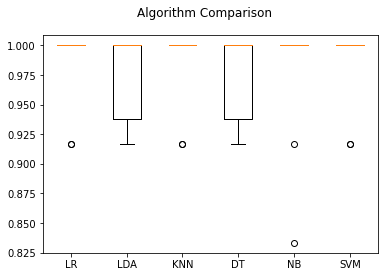

In [16]:
# d) Compare Algorithms

# We can also create a plot of the model evaluation results & compare the spread & the mean accuracy of each model. There is 
# a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times(10 fold cross validation).
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# You can see that the box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy.

In [17]:
# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

In [18]:
# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

The KNN algorithm was the most accurate model that we tested. Now we want to get an idea of the accuracy of the model on our validation dataset. This will give us an independent final check on the accuracy of the best model. It is important to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both
will result in an overly optimistic result. We can run the KNN model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [19]:
# a) Predictions on validation dataset

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
print("Accuracy Score:", accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))



Accuracy Score: 0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).